In [7]:
#https://towardsdatascience.com/an-end-to-end-project-on-time-series-analysis-and-forecasting-with-python-4835e6bf050b
#https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/
#https://www.youtube.com/watch?v=2XGSIlgUBDI
#https://towardsdatascience.com/time-series-in-python-exponential-smoothing-and-arima-processes-2c67f2a52788
#https://github.com/krishnaik06/ARIMA-And-Seasonal-ARIMA/blob/master/Untitled.ipynb

#to do https://www.kaggle.com/freespirit08/time-series-for-beginners-with-arima

#del df
#del df1
#del df2
#del timeseries

import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [8]:
df=pd.read_csv('C:/Users/gaurav.dubey/Desktop/TSA/TSA_1565_% On-Time First Case Starts.csv')

In [9]:
df

,HospitalId,HospitalGroupId,HospitalCity,OR_Type,HospitalCityOR,Year,Month,MetricId,MetricDsc,Numerator,...,Filter,DQ_Flag,DQ_Flag_DNT,DQ_Flag_Hosp,DQ_Flag_Threshold,DC_PACU_Flag,DB_Comment,CreateDtTm,LastUpdateBy,LastUpdateDtTm
0,100022,100021,ATL-EG,AGG,ATL-EG l AGG,2004,1,1565,M1565%On-Time First Case Starts,106.0,...,n2.CalculatedValueTypeId = 1 AND n2.Calculated...,NaN,NaN,NaN,NaN,NaN,NaN,2021-06-29 08:45:48.350,INTERNAL\svc.sqlpdv2,2021-06-29 08:45:48.350
1,100022,100021,ATL-EG,AGG,ATL-EG l AGG,2004,2,1565,M1565%On-Time First Case Starts,103.0,...,n2.CalculatedValueTypeId = 1 AND n2.Calculated...,NaN,NaN,NaN,NaN,NaN,NaN,2021-06-29 08:45:48.350,INTERNAL\svc.sqlpdv2,2021-06-29 08:45:48.350
2,100022,100021,ATL-EG,AGG,ATL-EG l AGG,2004,3,1565,M1565%On-Time First Case Starts,105.0,...,n2.CalculatedValueTypeId = 1 AND n2.Calculated...,NaN,NaN,NaN,NaN,NaN,NaN,2021-06-29 08:45:48.350,INTERNAL\svc.sqlpdv2,2021-06-29 08:45:48.350
3,100022,100021,ATL-EG,AGG,ATL-EG l AGG,2004,4,1565,M1565%On-Time First Case Starts,97.0,...,n2.CalculatedValueTypeId = 1 AND n2.Calculated...,NaN,NaN,NaN,NaN,NaN,NaN,2021-06-29 08:45:48.350,INTERNAL\svc.sqlpdv2,2021-06-29 08:45:48.350
4,100022,100021,ATL-EG,AGG,ATL-EG l AGG,2004,5,1565,M1565%On-Time First Case Starts,83.0,...,n2.CalculatedValueTypeId = 1 AND n2.Calculated...,NaN,NaN,NaN,NaN,NaN,NaN,2021-06-29 08:45:48.350,INTERNAL\svc.sqlpdv2,2021-06-29 08:45:48.350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8156,100055,100054,WAS,ALL,WAS l ALL,2020,8,1565,M1565%On-Time First Case Starts,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-06-29 08:45:48.350,INTERNAL\svc.sqlpdv2,2021-06-29 08:45:48.350
8157,100055,100054,WAS,ALL,WAS l ALL,2020,9,1565,M1565%On-Time First Case Starts,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-06-29 08:45:48.350,INTERNAL\svc.sqlpdv2,2021-06-29 08:45:48.350
8158,100055,100054,WAS,ALL,WAS l ALL,2020,10,1565,M1565%On-Time First Case Starts,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-06-29 08:45:48.350,INTERNAL\svc.sqlpdv2,2021-06-29 08:45:48.350
8159,100055,100054,WAS,ALL,WAS l ALL,2020,11,1565,M1565%On-Time First Case Starts,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-06-29 08:45:48.350,INTERNAL\svc.sqlpdv2,2021-06-29 08:45:48.350


In [10]:
df.sort_values(['Year', 'Month'], ascending=[True, True])

,HospitalId,HospitalGroupId,HospitalCity,OR_Type,HospitalCityOR,Year,Month,MetricId,MetricDsc,Numerator,...,Filter,DQ_Flag,DQ_Flag_DNT,DQ_Flag_Hosp,DQ_Flag_Threshold,DC_PACU_Flag,DB_Comment,CreateDtTm,LastUpdateBy,LastUpdateDtTm
423,100032,100029,AUR-MN,ALL,AUR-MN l ALL,2002,4,1565,M1565%On-Time First Case Starts,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-06-29 08:45:48.350,INTERNAL\svc.sqlpdv2,2021-06-29 08:45:48.350
653,100026,100056,BIR,ALL,BIR l ALL,2002,4,1565,M1565%On-Time First Case Starts,NaN,...,n2.CalculatedValueTypeId = 1 AND n2.Calculated...,NaN,NaN,NaN,NaN,NaN,NaN,2021-06-29 08:45:48.350,INTERNAL\svc.sqlpdv2,2021-06-29 08:45:48.350
908,100014,100013,BOS-MN,AGG,BOS-MN l AGG,2002,4,1565,M1565%On-Time First Case Starts,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-06-29 08:45:48.350,INTERNAL\svc.sqlpdv2,2021-06-29 08:45:48.350
1577,100061,100060,CIN-MN,ALL,CIN-MN l ALL,2002,4,1565,M1565%On-Time First Case Starts,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-06-29 08:45:48.350,INTERNAL\svc.sqlpdv2,2021-06-29 08:45:48.350
1802,100090,100089,COL,ALL,COL l ALL,2002,4,1565,M1565%On-Time First Case Starts,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-06-29 08:45:48.350,INTERNAL\svc.sqlpdv2,2021-06-29 08:45:48.350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7473,100039,100038,PIT,ALL,PIT l ALL,2020,12,1565,M1565%On-Time First Case Starts,130.0,...,n2.CalculatedValueTypeId = 1 AND n2.Calculated...,NaN,NaN,NaN,NaN,NaN,NaN,2021-06-29 08:45:48.350,INTERNAL\svc.sqlpdv2,2021-06-29 08:45:48.350
7692,100107,100106,SEA,ALL,SEA l ALL,2020,12,1565,M1565%On-Time First Case Starts,147.0,...,n2.CalculatedValueTypeId = 1 AND n2.Calculated...,NaN,NaN,NaN,NaN,NaN,NaN,2021-06-29 08:45:48.350,INTERNAL\svc.sqlpdv2,2021-06-29 08:45:48.350
7848,100111,100110,STL,ALL,STL l ALL,2020,12,1565,M1565%On-Time First Case Starts,215.0,...,n2.CalculatedValueTypeId = 1 AND n2.Calculated...,NaN,NaN,NaN,NaN,NaN,NaN,2021-06-29 08:45:48.350,INTERNAL\svc.sqlpdv2,2021-06-29 08:45:48.350
7980,100121,100120,UAC-OAK,ALL,UAC-OAK l ALL,2020,12,1565,M1565%On-Time First Case Starts,34.0,...,n2.CalculatedValueTypeId = 1 AND n2.Calculated...,NaN,NaN,NaN,NaN,NaN,NaN,2021-06-29 08:45:48.350,INTERNAL\svc.sqlpdv2,2021-06-29 08:45:48.350


In [11]:
df 

,HospitalId,HospitalGroupId,HospitalCity,OR_Type,HospitalCityOR,Year,Month,MetricId,MetricDsc,Numerator,...,Filter,DQ_Flag,DQ_Flag_DNT,DQ_Flag_Hosp,DQ_Flag_Threshold,DC_PACU_Flag,DB_Comment,CreateDtTm,LastUpdateBy,LastUpdateDtTm
0,100022,100021,ATL-EG,AGG,ATL-EG l AGG,2004,1,1565,M1565%On-Time First Case Starts,106.0,...,n2.CalculatedValueTypeId = 1 AND n2.Calculated...,NaN,NaN,NaN,NaN,NaN,NaN,2021-06-29 08:45:48.350,INTERNAL\svc.sqlpdv2,2021-06-29 08:45:48.350
1,100022,100021,ATL-EG,AGG,ATL-EG l AGG,2004,2,1565,M1565%On-Time First Case Starts,103.0,...,n2.CalculatedValueTypeId = 1 AND n2.Calculated...,NaN,NaN,NaN,NaN,NaN,NaN,2021-06-29 08:45:48.350,INTERNAL\svc.sqlpdv2,2021-06-29 08:45:48.350
2,100022,100021,ATL-EG,AGG,ATL-EG l AGG,2004,3,1565,M1565%On-Time First Case Starts,105.0,...,n2.CalculatedValueTypeId = 1 AND n2.Calculated...,NaN,NaN,NaN,NaN,NaN,NaN,2021-06-29 08:45:48.350,INTERNAL\svc.sqlpdv2,2021-06-29 08:45:48.350
3,100022,100021,ATL-EG,AGG,ATL-EG l AGG,2004,4,1565,M1565%On-Time First Case Starts,97.0,...,n2.CalculatedValueTypeId = 1 AND n2.Calculated...,NaN,NaN,NaN,NaN,NaN,NaN,2021-06-29 08:45:48.350,INTERNAL\svc.sqlpdv2,2021-06-29 08:45:48.350
4,100022,100021,ATL-EG,AGG,ATL-EG l AGG,2004,5,1565,M1565%On-Time First Case Starts,83.0,...,n2.CalculatedValueTypeId = 1 AND n2.Calculated...,NaN,NaN,NaN,NaN,NaN,NaN,2021-06-29 08:45:48.350,INTERNAL\svc.sqlpdv2,2021-06-29 08:45:48.350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8156,100055,100054,WAS,ALL,WAS l ALL,2020,8,1565,M1565%On-Time First Case Starts,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-06-29 08:45:48.350,INTERNAL\svc.sqlpdv2,2021-06-29 08:45:48.350
8157,100055,100054,WAS,ALL,WAS l ALL,2020,9,1565,M1565%On-Time First Case Starts,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-06-29 08:45:48.350,INTERNAL\svc.sqlpdv2,2021-06-29 08:45:48.350
8158,100055,100054,WAS,ALL,WAS l ALL,2020,10,1565,M1565%On-Time First Case Starts,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-06-29 08:45:48.350,INTERNAL\svc.sqlpdv2,2021-06-29 08:45:48.350
8159,100055,100054,WAS,ALL,WAS l ALL,2020,11,1565,M1565%On-Time First Case Starts,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-06-29 08:45:48.350,INTERNAL\svc.sqlpdv2,2021-06-29 08:45:48.350


In [12]:
df1 = df[df['HospitalCityOR'] == 'ATL-EG l AGG']

In [13]:
df1

,HospitalId,HospitalGroupId,HospitalCity,OR_Type,HospitalCityOR,Year,Month,MetricId,MetricDsc,Numerator,...,Filter,DQ_Flag,DQ_Flag_DNT,DQ_Flag_Hosp,DQ_Flag_Threshold,DC_PACU_Flag,DB_Comment,CreateDtTm,LastUpdateBy,LastUpdateDtTm
0,100022,100021,ATL-EG,AGG,ATL-EG l AGG,2004,1,1565,M1565%On-Time First Case Starts,106.0,...,n2.CalculatedValueTypeId = 1 AND n2.Calculated...,NaN,NaN,NaN,NaN,NaN,NaN,2021-06-29 08:45:48.350,INTERNAL\svc.sqlpdv2,2021-06-29 08:45:48.350
1,100022,100021,ATL-EG,AGG,ATL-EG l AGG,2004,2,1565,M1565%On-Time First Case Starts,103.0,...,n2.CalculatedValueTypeId = 1 AND n2.Calculated...,NaN,NaN,NaN,NaN,NaN,NaN,2021-06-29 08:45:48.350,INTERNAL\svc.sqlpdv2,2021-06-29 08:45:48.350
2,100022,100021,ATL-EG,AGG,ATL-EG l AGG,2004,3,1565,M1565%On-Time First Case Starts,105.0,...,n2.CalculatedValueTypeId = 1 AND n2.Calculated...,NaN,NaN,NaN,NaN,NaN,NaN,2021-06-29 08:45:48.350,INTERNAL\svc.sqlpdv2,2021-06-29 08:45:48.350
3,100022,100021,ATL-EG,AGG,ATL-EG l AGG,2004,4,1565,M1565%On-Time First Case Starts,97.0,...,n2.CalculatedValueTypeId = 1 AND n2.Calculated...,NaN,NaN,NaN,NaN,NaN,NaN,2021-06-29 08:45:48.350,INTERNAL\svc.sqlpdv2,2021-06-29 08:45:48.350
4,100022,100021,ATL-EG,AGG,ATL-EG l AGG,2004,5,1565,M1565%On-Time First Case Starts,83.0,...,n2.CalculatedValueTypeId = 1 AND n2.Calculated...,NaN,NaN,NaN,NaN,NaN,NaN,2021-06-29 08:45:48.350,INTERNAL\svc.sqlpdv2,2021-06-29 08:45:48.350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,100022,100021,ATL-EG,AGG,ATL-EG l AGG,2020,8,1565,M1565%On-Time First Case Starts,169.0,...,n2.CalculatedValueTypeId = 1 AND n2.Calculated...,NaN,NaN,NaN,NaN,NaN,NaN,2021-06-29 08:45:48.350,INTERNAL\svc.sqlpdv2,2021-06-29 08:45:48.350
200,100022,100021,ATL-EG,AGG,ATL-EG l AGG,2020,9,1565,M1565%On-Time First Case Starts,186.0,...,n2.CalculatedValueTypeId = 1 AND n2.Calculated...,NaN,NaN,NaN,NaN,NaN,NaN,2021-06-29 08:45:48.350,INTERNAL\svc.sqlpdv2,2021-06-29 08:45:48.350
201,100022,100021,ATL-EG,AGG,ATL-EG l AGG,2020,10,1565,M1565%On-Time First Case Starts,194.0,...,n2.CalculatedValueTypeId = 1 AND n2.Calculated...,NaN,NaN,NaN,NaN,NaN,NaN,2021-06-29 08:45:48.350,INTERNAL\svc.sqlpdv2,2021-06-29 08:45:48.350
202,100022,100021,ATL-EG,AGG,ATL-EG l AGG,2020,11,1565,M1565%On-Time First Case Starts,172.0,...,n2.CalculatedValueTypeId = 1 AND n2.Calculated...,NaN,NaN,NaN,NaN,NaN,NaN,2021-06-29 08:45:48.350,INTERNAL\svc.sqlpdv2,2021-06-29 08:45:48.350


In [18]:
df2=df1[df1.columns[df1.columns.isin(['HospitalCityOR', 'Year','Month','Ratio'])]]
df2

,HospitalCityOR,Year,Month,Ratio
0,ATL-EG l AGG,2004,1,0.726027
1,ATL-EG l AGG,2004,2,0.643750
2,ATL-EG l AGG,2004,3,0.561497
3,ATL-EG l AGG,2004,4,0.510526
4,ATL-EG l AGG,2004,5,0.500000
...,...,...,...,...
199,ATL-EG l AGG,2020,8,0.728448
200,ATL-EG l AGG,2020,9,0.826666
201,ATL-EG l AGG,2020,10,0.749034
202,ATL-EG l AGG,2020,11,0.792626


In [19]:
df2 = df2.sort_values(["Year", "Month"], ascending = (True, True))

In [20]:
df2

,HospitalCityOR,Year,Month,Ratio
0,ATL-EG l AGG,2004,1,0.726027
1,ATL-EG l AGG,2004,2,0.643750
2,ATL-EG l AGG,2004,3,0.561497
3,ATL-EG l AGG,2004,4,0.510526
4,ATL-EG l AGG,2004,5,0.500000
...,...,...,...,...
199,ATL-EG l AGG,2020,8,0.728448
200,ATL-EG l AGG,2020,9,0.826666
201,ATL-EG l AGG,2020,10,0.749034
202,ATL-EG l AGG,2020,11,0.792626


In [21]:
timeseries = df2.assign(Date=pd.to_datetime(df2[['Year', 'Month']].assign(day=1)))

In [22]:
timeseries

,HospitalCityOR,Year,Month,Ratio,Date
0,ATL-EG l AGG,2004,1,0.726027,2004-01-01
1,ATL-EG l AGG,2004,2,0.643750,2004-02-01
2,ATL-EG l AGG,2004,3,0.561497,2004-03-01
3,ATL-EG l AGG,2004,4,0.510526,2004-04-01
4,ATL-EG l AGG,2004,5,0.500000,2004-05-01
...,...,...,...,...,...
199,ATL-EG l AGG,2020,8,0.728448,2020-08-01
200,ATL-EG l AGG,2020,9,0.826666,2020-09-01
201,ATL-EG l AGG,2020,10,0.749034,2020-10-01
202,ATL-EG l AGG,2020,11,0.792626,2020-11-01


<AxesSubplot:xlabel='Date'>

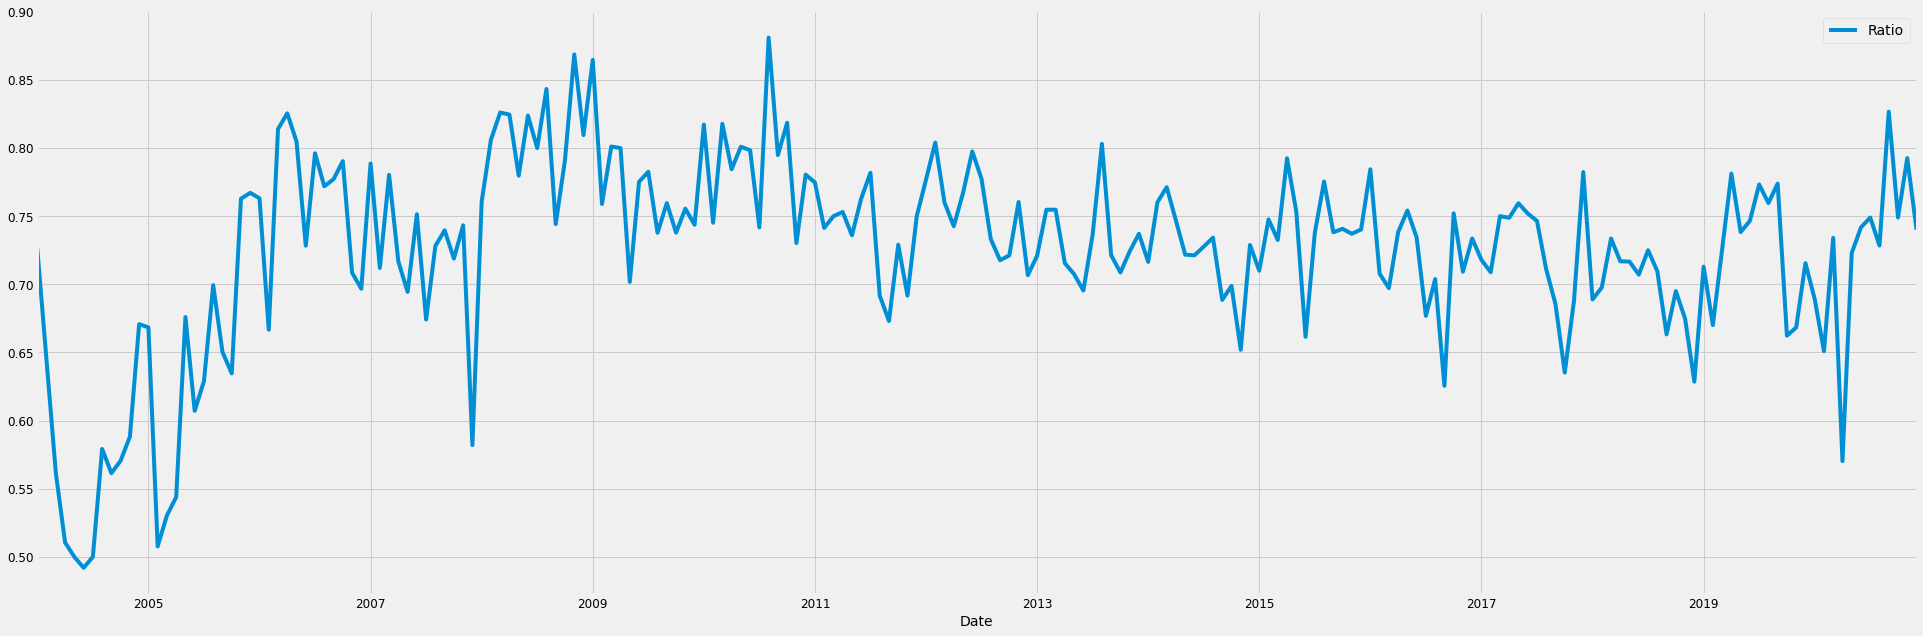

In [23]:
timeseries.plot(kind='line',x='Date', y='Ratio',figsize=(30,10))

In [24]:
#Visualizing time series 1565 data
plt.show()

In [23]:
timeseries

,HospitalCityOR,Year,Month,Ratio,Date
0,ATL-EG l AGG,2004,1,0.726027,2004-01-01
1,ATL-EG l AGG,2004,2,0.643750,2004-02-01
2,ATL-EG l AGG,2004,3,0.561497,2004-03-01
3,ATL-EG l AGG,2004,4,0.510526,2004-04-01
4,ATL-EG l AGG,2004,5,0.500000,2004-05-01
5,ATL-EG l AGG,2004,6,0.491978,2004-06-01
6,ATL-EG l AGG,2004,7,0.500000,2004-07-01
7,ATL-EG l AGG,2004,8,0.579234,2004-08-01
8,ATL-EG l AGG,2004,9,0.561403,2004-09-01
9,ATL-EG l AGG,2004,10,0.570588,2004-10-01


In [26]:
timeseries2=timeseries.set_index('Date',inplace=False)

In [27]:
timeseries2

,HospitalCityOR,Year,Month,Ratio
Date,,,,
2004-01-01,ATL-EG l AGG,2004,1,0.726027
2004-02-01,ATL-EG l AGG,2004,2,0.643750
2004-03-01,ATL-EG l AGG,2004,3,0.561497
2004-04-01,ATL-EG l AGG,2004,4,0.510526
2004-05-01,ATL-EG l AGG,2004,5,0.500000
...,...,...,...,...
2020-08-01,ATL-EG l AGG,2020,8,0.728448
2020-09-01,ATL-EG l AGG,2020,9,0.826666
2020-10-01,ATL-EG l AGG,2020,10,0.749034


In [28]:
timeseries2


,HospitalCityOR,Year,Month,Ratio
Date,,,,
2004-01-01,ATL-EG l AGG,2004,1,0.726027
2004-02-01,ATL-EG l AGG,2004,2,0.643750
2004-03-01,ATL-EG l AGG,2004,3,0.561497
2004-04-01,ATL-EG l AGG,2004,4,0.510526
2004-05-01,ATL-EG l AGG,2004,5,0.500000
...,...,...,...,...
2020-08-01,ATL-EG l AGG,2020,8,0.728448
2020-09-01,ATL-EG l AGG,2020,9,0.826666
2020-10-01,ATL-EG l AGG,2020,10,0.749034


In [29]:
timeseries2.drop(['HospitalCityOR','Year','Month'], axis = 1,inplace = True)

In [106]:
timeseries2

,Ratio
Date,
2004-01-01,0.726027
2004-02-01,0.643750
2004-03-01,0.561497
2004-04-01,0.510526
2004-05-01,0.500000
2004-06-01,0.491978
2004-07-01,0.500000
2004-08-01,0.579234
2004-09-01,0.561403


<AxesSubplot:xlabel='Date'>

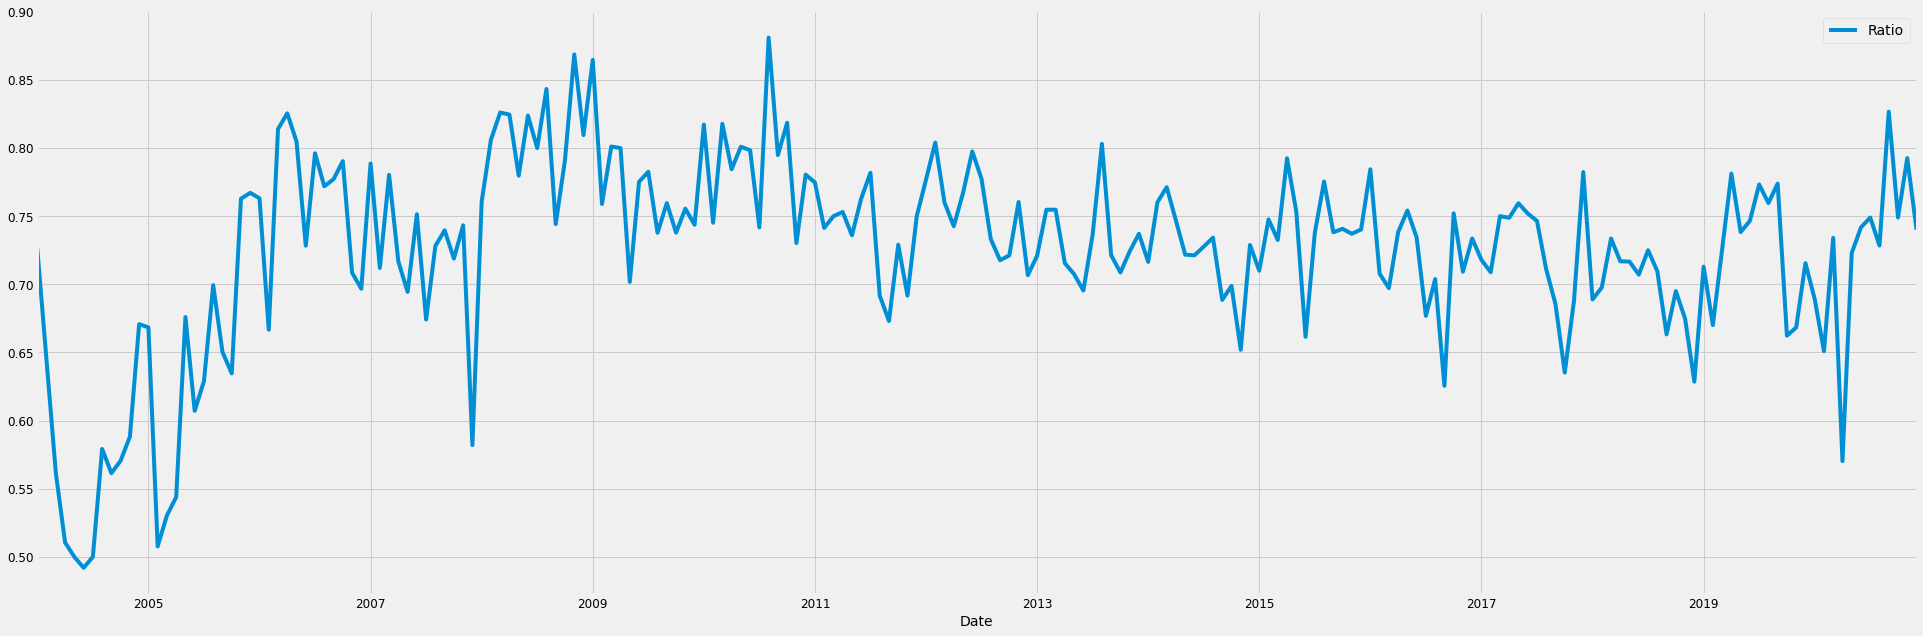

In [30]:
timeseries2.plot(figsize=(30,10))

In [32]:
plt.show() #looks seasonal and non stationary

In [108]:
### Testing For Stationarity.Dickey-Fuller Test

from statsmodels.tsa.stattools import adfuller

In [110]:
test_result=adfuller(timeseries2['Ratio'])

In [111]:
def adfuller_test(Ratio):
    result=adfuller(Ratio)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [112]:
adfuller_test(timeseries2['Ratio'])

ADF Test Statistic : -3.52772793991
p-value : 0.00730289144042
#Lags Used : 3
Number of Observations Used : 200
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


# AR Model
Final Thoughts on Autocorrelation and Partial Autocorrelation
Identification of an AR model is often best done with the PACF.
For an AR model, the theoretical PACF “shuts off” past the order of the model. The phrase “shuts off” means that in theory the partial autocorrelations are equal to 0 beyond that point. Put another way, the number of non-zero partial autocorrelations gives the order of the AR model. By the “order of the model” we mean the most extreme lag of x that is used as a predictor.
Identification of an MA model is often best done with the ACF rather than the PACF.

For an MA model, the theoretical PACF does not shut off, but instead tapers toward 0 in some manner. A clearer pattern for an MA model is in the ACF. The ACF will have non-zero autocorrelations only at lags involved in the model.

p,d,q p AR model lags d differencing q MA lags

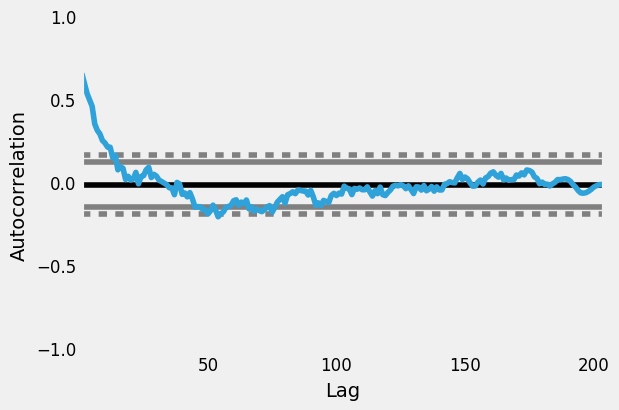

In [116]:
from pandas.tools.plotting import autocorrelation_plot
autocorrelation_plot(timeseries2['Ratio'])
plt.show()

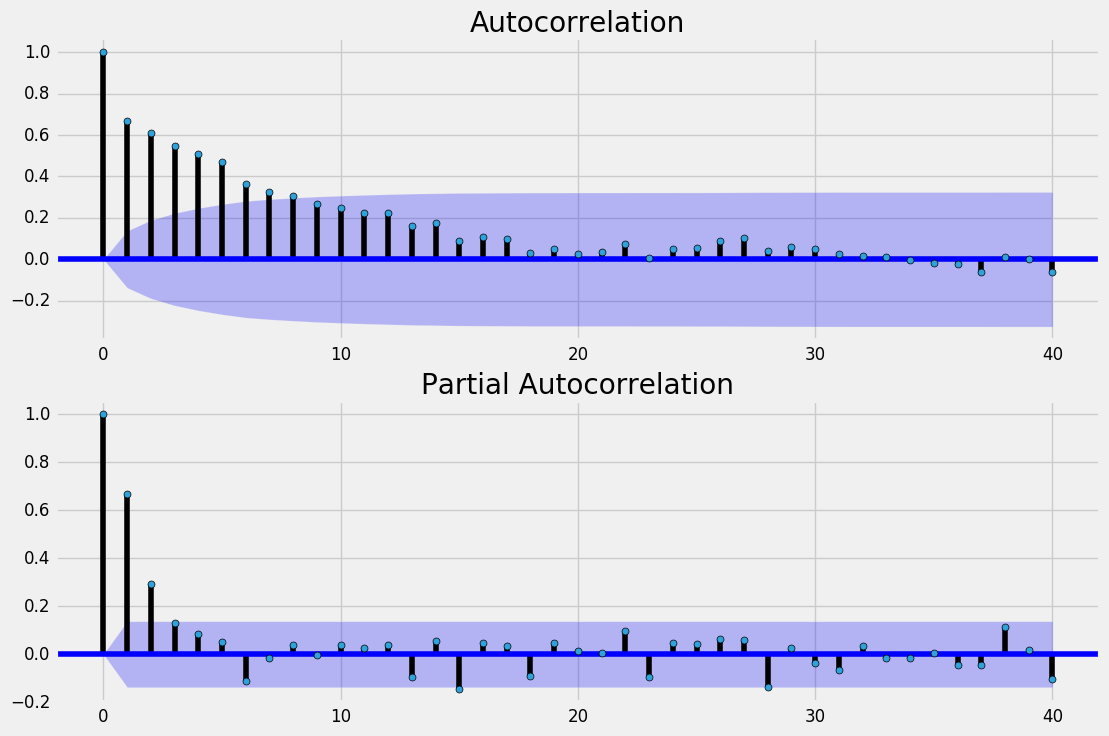

In [120]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(timeseries2['Ratio'],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(timeseries2['Ratio'],lags=40,ax=ax2)
plt.show()

In [31]:
# For non-seasonal data
#p=3, d=0, q=0 or 1 
#p is 3 because in pacc it tapers at 3, d=0 as seasonality wasnt adjusted, 
#ARIMA should be used only when data isnt seasonal. --This is DEMO only wont work as the data is seasonal in this case

from statsmodels.tsa.arima_model import ARIMA

In [32]:
model=ARIMA(timeseries2['Ratio'],order=(3,1,1))
model_fit=model.fit()

In [33]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Ratio   No. Observations:                  203
Model:                 ARIMA(3, 1, 1)   Log Likelihood                 324.912
Method:                       css-mle   S.D. of innovations              0.049
Date:                Fri, 02 Jul 2021   AIC                           -637.824
Time:                        09:14:32   BIC                           -617.945
Sample:                    02-01-2004   HQIC                          -629.782
                         - 12-01-2020                                         
=================================================================================
                    coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
const             0.0006      0.001      0.773      0.440        -0.001     0.002
ar.L1.D.Ratio     0.3196      0.107      2.996      0.003         0.110     0.529
ar.L2.D.Ratio     0.1526      0.092      1.653      0.100        -0.028     0.334
ar.L3.D.Ratio     0.0725      0.086      0.841      0.402        -0.097     0.241
ma.L1.D.Ratio    -0.9009      0.073    -12.258      0.000        -1.045    -0.757
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.4457           -0.0000j            1.4457           -0.0000
AR.2           -1.7754           -2.5280j            3.0891           -0.3474
AR.3           -1.7754           +2.5280j            3.0891            0.3474
MA.1            1.1100           +0.0000j            1.1100            0.0000
-----------------------------------------------------------------------------
"""

In [41]:
timeseries2['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
timeseries2[['Ratio','forecast']].plot(figsize=(12,8))

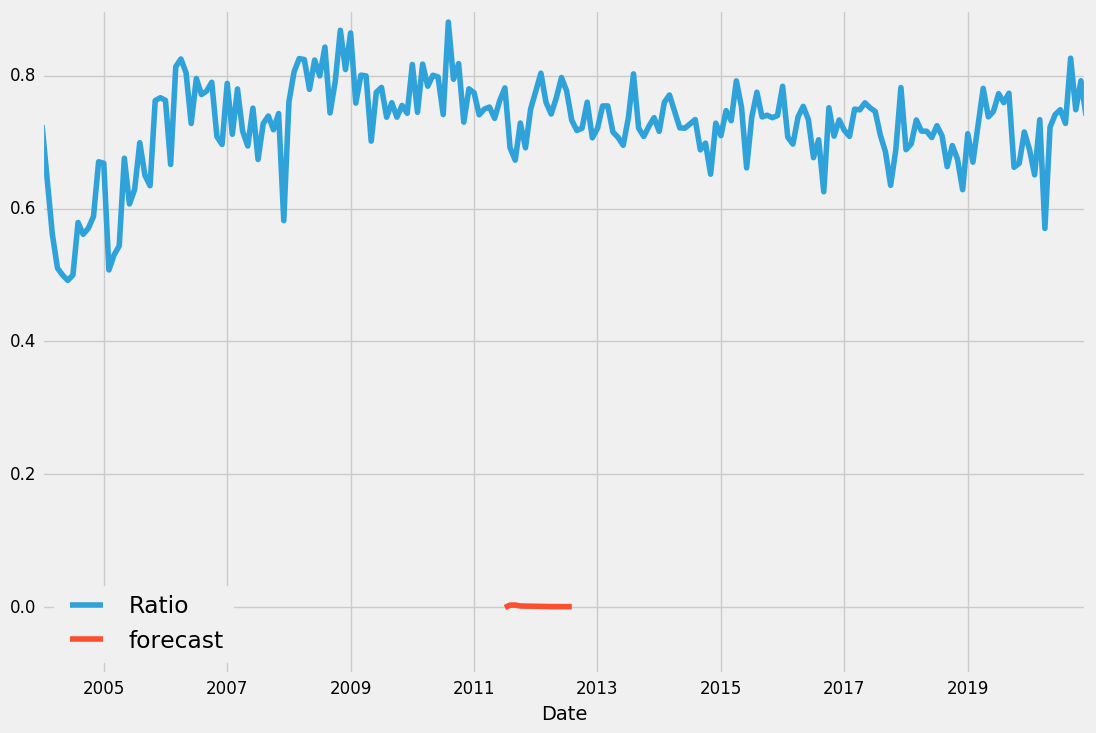

In [42]:
plt.show() #doesnt make sense as no forecast

In [41]:
import statsmodels.api as sm

In [39]:
model=sm.tsa.statespace.SARIMAX(timeseries2['Ratio'],order=(3, 1, 1),seasonal_order=(3,1,1,12))
results=model.fit()

<AxesSubplot:xlabel='Date'>

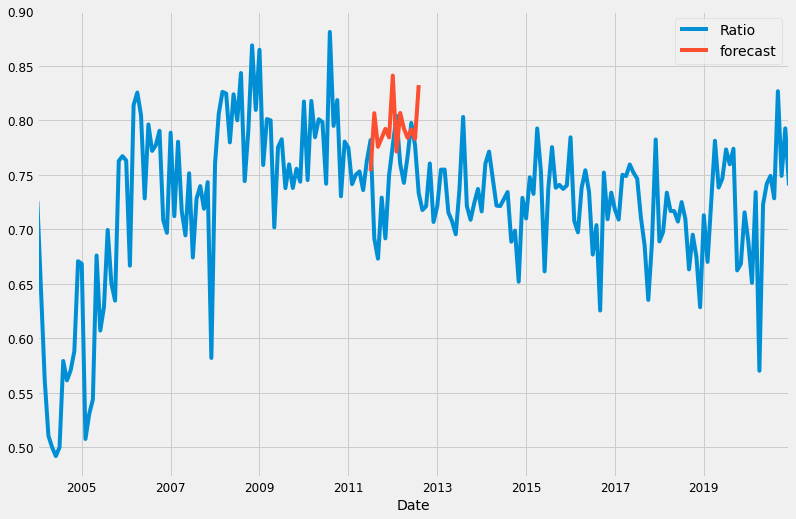

In [40]:
timeseries2['forecast']=results.predict(start=90,end=103,dynamic=True)
timeseries2[['Ratio','forecast']].plot(figsize=(12,8))

In [42]:
#create future data using pandas
from pandas.tseries.offsets import DateOffset
future_dates=[timeseries2.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [43]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=timeseries2.columns)

In [44]:
future_datest_df.tail()

,Ratio,forecast
2022-07-01,NaN,NaN
2022-08-01,NaN,NaN
2022-09-01,NaN,NaN
2022-10-01,NaN,NaN
2022-11-01,NaN,NaN


In [45]:
future_df=pd.concat([timeseries2,future_datest_df])

<AxesSubplot:>

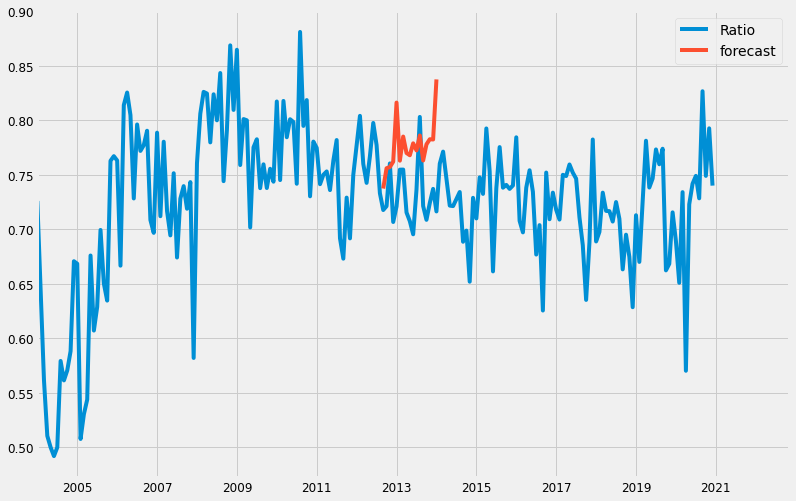

In [46]:
future_df['forecast'] = results.predict(start = 104, end = 120, dynamic= True)  
future_df[['Ratio', 'forecast']].plot(figsize=(12, 8))